In [ ]:
import pandas as pd
import numpy as np
#import transforms
#from transformers import M2M100Config, M2M100ForConditionalGeneration, M2M100Tokenizer

In [ ]:
!pip install Sentencepiece
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 3.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 4.0 MB/s 
     |████████████████████████████████| 120 kB 51.7 MB/s 
     |████████████████████████████████| 6.6 MB 39.2 MB/s 


In [ ]:
pip install simpletransformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 250 kB 4.2 MB/s 
     |████████████████████████████████| 431 kB 53.6 MB/s 
     |████████████████████████████████| 43 kB 2.1 MB/s 
     |████████████████████████████████| 9.2 MB 48.8 MB/s 
     |████████████████████████████████| 1.8 MB 43.7 MB/s 
     |████████████████████████████████| 162 kB 52.0 MB/s 
     |████████████████████████████████| 181 kB 53.7 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 158 kB 41.0 MB/s 
     |████████████████████████████████| 157 kB 43.0 MB/s 
     |████████████████████████████████| 157 kB 10.0 MB/s 
     |████████████████████████████████| 157 kB 50.0 MB/s 
     |████████████████████████████████| 157 kB 51.1 MB/s 
     |████████████████████████████████| 157 kB 45.4 MB/s 
     |████████████████████████████████| 157 kB 51.4 MB/s 
     |██████████████████████████████

In [ ]:
df = pd.read_csv("ta-emotion10-train.csv", sep ='\t')
df

,Neutral,நாளைக்கு அரிசிக்கு இந்த நிலமை வந்தா 🙂
0,Anger,மானம் கேட்ட அன்புமணி
1,Neutral,தவறு இஸ்ரேல் இருக்காது இதை நான் கூறவில்லை ஹமாஸ...
2,Joy,கொங்கு நாட்டு சிங்கம் உன்மையும் நேர்மையும் உலை...
3,Neutral,இவர் யார்? ஒவ்வொரு வார்த்தையும் முன்னுக்கு பின...
4,Disguist,தினமும் ஸ்டாலின் செருப்ப தொடைத்து கொடுக்குற வன...
...,...,...
14202,Trust,பெ மணியரசன் கூறுவதைஉணர்ந்து. செயலாற்றுவதேஇன்ற...
14203,Ambiguous,இன்னும் எத்தன நாள் வச்சி செய்வீங்க.
14204,Anticipation,அடுத்த ஏதோ தயார்பன்னிட்டான்
14205,Ambiguous,தமிழ் மற்றும் சமஸ்கிருதம்


In [ ]:
df.rename(columns={'Neutral': 'emo', 'நாளைக்கு அரிசிக்கு இந்த நிலமை வந்தா 🙂': 'text'}, inplace=True)

In [ ]:
dftext=df["text"]
dftext

0                                     மானம் கேட்ட அன்புமணி
1        தவறு இஸ்ரேல் இருக்காது இதை நான் கூறவில்லை ஹமாஸ...
2        கொங்கு நாட்டு சிங்கம் உன்மையும் நேர்மையும் உலை...
3        இவர் யார்? ஒவ்வொரு வார்த்தையும் முன்னுக்கு பின...
4        தினமும் ஸ்டாலின் செருப்ப தொடைத்து கொடுக்குற வன...
                               ...                        
14202    பெ மணியரசன் கூறுவதைஉணர்ந்து.  செயலாற்றுவதேஇன்ற...
14203                  இன்னும் எத்தன நாள் வச்சி செய்வீங்க.
14204                          அடுத்த ஏதோ தயார்பன்னிட்டான்
14205                            தமிழ் மற்றும் சமஸ்கிருதம்
14206                          எனக்கும் அதே டவுட் தான் சகோ
Name: text, Length: 14207, dtype: object

In [ ]:
emotion = df.emo.unique()
emotion

array(['Anger', 'Neutral', 'Joy', 'Disguist', 'Trust', 'Anticipation',
       'Ambiguous', 'Love', 'Surprise', 'Sadness', 'Fear'], dtype=object)

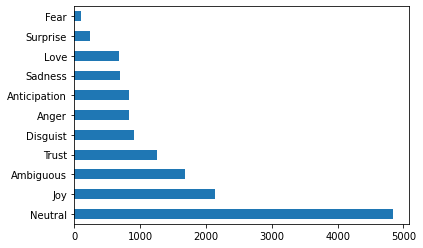

In [ ]:
import matplotlib.pyplot as plt
df["emo"].value_counts().plot(kind ='barh')

In [ ]:
from transformers import MBartForConditionalGeneration, MBart50TokenizerFast

model = MBartForConditionalGeneration.from_pretrained("facebook/mbart-large-50")
tokenizer = MBart50TokenizerFast.from_pretrained("facebook/mbart-large-50", src_lang="ta_IN", tgt_lang="en_XX")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

Downloading:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.44G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/531 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/649 [00:00<?, ?B/s]

In [ ]:
def translate(text):
    translated = mt.translate(text, source=dlt.lang.TAMIL, target=dlt.lang.ENGLISH, batch_size=1, verbose = True)
    return translated

In [ ]:
batch1 = df[:10]
batch1["translated"] = batch1["text"].apply(lambda x: translate(x))

NameError: ignored

In [ ]:
batch1['translated_text'] = mt.translate(batch1['text'], source=dlt.lang.TAMIL, target=dlt.lang.ENGLISH, batch_size=1, verbose = True)

batch1.head()

In [ ]:
import string
def removepunctuation(text):
    clean="".join([i for i in text if i not in string.punctuation])
    return clean

df['text']= df['text'].apply(lambda x:removepunctuation(x))
df.head()

,emo,text
0,Anger,மானம் கேட்ட அன்புமணி
1,Neutral,தவறு இஸ்ரேல் இருக்காது இதை நான் கூறவில்லை ஹமாஸ...
2,Joy,கொங்கு நாட்டு சிங்கம் உன்மையும் நேர்மையும் உலை...
3,Neutral,இவர் யார் ஒவ்வொரு வார்த்தையும் முன்னுக்கு பின்...
4,Disguist,தினமும் ஸ்டாலின் செருப்ப தொடைத்து கொடுக்குற வன...


In [ ]:
print(rows[12])

In [ ]:
import re
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

df['text']= df['text'].apply(lambda x:deEmojify(x))
df.iloc[12]

emo                                                 Trust
text    நமது குரு அவர்களிடம் கேட்டு கொடுக்கப்படும் நன்றி 
Name: 12, dtype: object

In [ ]:
def tokenize(text):
    tokens = text.split()
    return tokens

df['text_tokens']= df['text'].apply(lambda x:tokenize(x))
df.head()

,emo,text,text_tokens
0,Anger,மானம் கேட்ட அன்புமணி,"[மானம், கேட்ட, அன்புமணி]"
1,Neutral,தவறு இஸ்ரேல் இருக்காது இதை நான் கூறவில்லை ஹமாஸ...,"[தவறு, இஸ்ரேல், இருக்காது, இதை, நான், கூறவில்ல..."
2,Joy,கொங்கு நாட்டு சிங்கம் உன்மையும் நேர்மையும் உலை...,"[கொங்கு, நாட்டு, சிங்கம், உன்மையும், நேர்மையும..."
3,Neutral,இவர் யார் ஒவ்வொரு வார்த்தையும் முன்னுக்கு பின்...,"[இவர், யார், ஒவ்வொரு, வார்த்தையும், முன்னுக்கு..."
4,Disguist,தினமும் ஸ்டாலின் செருப்ப தொடைத்து கொடுக்குற வன...,"[தினமும், ஸ்டாலின், செருப்ப, தொடைத்து, கொடுக்க..."


In [ ]:
df.iloc[14093][2]

['இவ்வுலகத்தில்', 'உன்னதமான', 'வீரன்', 'நெப்போலியனுக்கு', 'இணையானவர்']

In [ ]:
with open('tamil_stopwords.txt', encoding='utf-8') as file:
    stopwords = file.read()

In [ ]:
def removestopwords(text_data):
    removed=[]
    removed= [s for s in text_data if s not in stopwords]  
    return removed

df['text_tokens_wo_sw']= df['text_tokens'].apply(lambda x:removestopwords(x))
df

,emo,text,text_tokens,text_tokens_wo_sw
0,Anger,மானம் கேட்ட அன்புமணி,"[மானம், கேட்ட, அன்புமணி]","[மானம், கேட்ட, அன்புமணி]"
1,Neutral,தவறு இஸ்ரேல் இருக்காது இதை நான் கூறவில்லை ஹமாஸ...,"[தவறு, இஸ்ரேல், இருக்காது, இதை, நான், கூறவில்ல...","[தவறு, இஸ்ரேல், இருக்காது, கூறவில்லை, ஹமாஸ், ந..."
2,Joy,கொங்கு நாட்டு சிங்கம் உன்மையும் நேர்மையும் உலை...,"[கொங்கு, நாட்டு, சிங்கம், உன்மையும், நேர்மையும...","[கொங்கு, நாட்டு, சிங்கம், உன்மையும், நேர்மையும..."
3,Neutral,இவர் யார் ஒவ்வொரு வார்த்தையும் முன்னுக்கு பின்...,"[இவர், யார், ஒவ்வொரு, வார்த்தையும், முன்னுக்கு...","[ஒவ்வொரு, வார்த்தையும், முன்னுக்கு, முரணாக]"
4,Disguist,தினமும் ஸ்டாலின் செருப்ப தொடைத்து கொடுக்குற வன...,"[தினமும், ஸ்டாலின், செருப்ப, தொடைத்து, கொடுக்க...","[தினமும், ஸ்டாலின், செருப்ப, தொடைத்து, கொடுக்க..."
...,...,...,...,...
14202,Trust,பெ மணியரசன் கூறுவதைஉணர்ந்து செயலாற்றுவதேஇன்றை...,"[பெ, மணியரசன், கூறுவதைஉணர்ந்து, செயலாற்றுவதேஇன...","[மணியரசன், கூறுவதைஉணர்ந்து, செயலாற்றுவதேஇன்றைய..."
14203,Ambiguous,இன்னும் எத்தன நாள் வச்சி செய்வீங்க,"[இன்னும், எத்தன, நாள், வச்சி, செய்வீங்க]","[எத்தன, நாள், வச்சி, செய்வீங்க]"
14204,Anticipation,அடுத்த ஏதோ தயார்பன்னிட்டான்,"[அடுத்த, ஏதோ, தயார்பன்னிட்டான்]","[ஏதோ, தயார்பன்னிட்டான்]"
14205,Ambiguous,தமிழ் மற்றும் சமஸ்கிருதம்,"[தமிழ், மற்றும், சமஸ்கிருதம்]","[தமிழ், சமஸ்கிருதம்]"


In [ ]:
from gensim.models import FastText
model_ted = FastText(df["text_tokens_wo_sw"], vector_size=100, window=5, min_count=1, workers=4, sg=1)

In [ ]:
model_ted.wv.most_similar('நாள்')

In [ ]:
from gensim.models import FastText
model_ted = FastText(df["text_tokens_wo_sw"], vector_size=100, window=5, min_count=1, workers=4, sg=1)

In [ ]:
from transformers import pipeline
classifier = pipeline("zero-shot-classification",
                      model="facebook/bart-large-mnli")

Downloading:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
sequence_to_classify = "கொங்கு நாட்டு சிங்கம் உன்மையும் நேர்மையும்"
candidate_labels = ['Anger', 'Neutral', 'Joy', 'Disgust', 'Trust', 'Anticipation',
       'Ambiguous', 'Love', 'Surprise', 'Sadness', 'Fear']
classifier(sequence_to_classify, candidate_labels, multi_label=False)

{'sequence': 'கொங்கு நாட்டு சிங்கம் உன்மையும் நேர்மையும்',
 'labels': ['Ambiguous',
  'Anger',
  'Anticipation',
  'Disgust',
  'Joy',
  'Neutral',
  'Trust',
  'Fear',
  'Sadness',
  'Surprise',
  'Love'],
 'scores': [0.29380422830581665,
  0.08847793936729431,
  0.08314941078424454,
  0.07700084894895554,
  0.076150082051754,
  0.07539236545562744,
  0.07317992299795151,
  0.07275331765413284,
  0.06573228538036346,
  0.0585133396089077,
  0.03584630787372589]}

In [ ]:
!pip install sacremoses

In [ ]:
from transformers import pipeline

In [ ]:
from transformers import pipeline

model_checkpoint = "Helsinki-NLP/opus-mt-dra-en"
translator = pipeline("translation", model=model_checkpoint)
translator("சப்ப போனாரு நண்பா")

Downloading:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/308M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.17M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/818k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.34M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/transformers/models/marian/tokenization_marian.py:194: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


[{'translation_text': 'The Chukar’s Celibacy'}]

In [ ]:
model_checkpoint = "ai4bharat/IndicBART"
translator = pipeline("translation", model=model_checkpoint)
translator("சப்ப போனாரு நண்பா")

In [ ]:
model_checkpoint = "google/mt5-base"
translator = pipeline("translation", model=model_checkpoint)
translator("சப்ப போனாரு நண்பா")

Downloading:   0%|          | 0.00/702 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.33G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/376 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/transformers/convert_slow_tokenizer.py:447: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  "The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option"


[{'translation_text': '<extra_id_0>'}]

In [ ]:
model_checkpoint = "facebook/mbart-large-50"
translator = pipeline("translation", model=model_checkpoint, tgt_lang="ta_IN", src_lang="en_XX")
translator("சப்ப போனாரு நண்பா")

[{'translation_text': ''}]